# 5. 深度学习用于计算机视觉

## 5.2. 在小型数据集上从头开始训练一个卷积神经网络

数据下载：<https://www.kaggle.com/c/dogs-vs-cats/data>

In [1]:
# 将图像复制到训练、验证和测试的目录
import os, shutil

original_dataset_dir = './assets/ignore/kaggle_original_data/train'    # 原始数据集解压目录的路径
base_dir = './assets/ignore/cats_and_dogs_small'                       # 保存较小数据集的目录
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')                            # 训练目录
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')                  # 验证目录
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')                              # 测试目录
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')                       # 猫的训练目录
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')                       # 狗的训练目录
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')             # 猫的验证目录
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')             # 狗的验证目录
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')                         # 猫的测试目录
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')                         # 狗的测试目录
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                 # 将前1000张猫的图像复制到train_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]           # 将接下来500张猫的图像复制到validation_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]           # 将接下来的500张猫的图像复制到test_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                 # 将前1000张狗的图像复制到train_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]           # 将接下来500张狗的图像复制到validation_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]           # 将接下来500张狗的图像复制到test_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
# 查看每个分组（训练/ 验证/ 测试）中分别包含多少张图像
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [3]:
# 将猫狗分类的小型卷积神经网络实例化
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2024-09-02 19:31:17.949203: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 19:31:17.955928: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 19:31:17.973654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 19:31:17.999833: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 19:31:18.007605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 19:31:18.029952: I tensorflow/core/platform/cpu_feature_gu

In [4]:
# 看一下特征图的维度如何随着每层变化
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 配置模型用于训练
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [6]:
# 使用ImageDataGenerator从目录中读取图像
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  # 将所有图像乘以1/255缩放
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,               # 目标目录
    target_size=(150, 150),  # 将所有图像的大小调整为150×150
    batch_size=20,
    class_mode='binary')     # 因为使用了binary_crossentropy损失，所以需要用二进制标签

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# 利用批量生成器拟合模型
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


/root/GithubProjects/HelloAI/Book/Python深度学习/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 292ms/step - acc: 0.5176 - loss: 0.6941 - val_acc: 0.5710 - val_loss: 0.6811
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30


2024-09-02 19:32:07.883719: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-09-02 19:32:07.890738: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - acc: 0.5742 - loss: 0.6762 - val_acc: 0.6350 - val_loss: 0.6557
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30


2024-09-02 19:32:36.947493: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - acc: 0.6251 - loss: 0.6436 - val_acc: 0.6020 - val_loss: 0.6470
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - acc: 0.6744 - loss: 0.6088 - val_acc: 0.6500 - val_loss: 0.6224
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 148us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30


2024-09-02 19:33:36.632317: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - acc: 0.7091 - loss: 0.5624 - val_acc: 0.6480 - val_loss: 0.6128
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - acc: 0.7301 - loss: 0.5424 - val_acc: 0.6680 - val_loss: 0.5998
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 124us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - acc: 0.7301 - loss: 0.5292 - val_acc: 0.6680 - val_loss: 0.5930
Epoch 14/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 288ms/step - acc: 0.7323 - loss: 0.5072 - val_acc: 0.6810 - val_loss: 0.5891
Epoch 16/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/30


2024-09-02 19:35:46.294427: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - acc: 0.7481 - loss: 0.4990 - val_acc: 0.6980 - val_loss: 0.5761
Epoch 18/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 19/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - acc: 0.7829 - loss: 0.4709 - val_acc: 0.6670 - val_loss: 0.6490
Epoch 20/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 21/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - acc: 0.7851 - loss: 0.4560 - val_acc: 0.6840 - val_loss: 0.5744
Epoch 22/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 23/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - acc: 0.8000 - loss: 0.4192 - val_acc: 0.6920 - val_loss: 0.6071
Epoch 24/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 25/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - acc: 0.8091 - loss: 0.4042 - val_acc: 0.7160 - val_loss: 0.5742
Epoch 26/30
100/100 ━━━━━━━━━━━━━━━

In [8]:
# 保存模型
model.save('./assets/ignore/cats_and_dogs_small/cats_and_dogs_small_1.h5')

ValueError: x and y must have same first dimension, but have shapes (30,) and (15,)

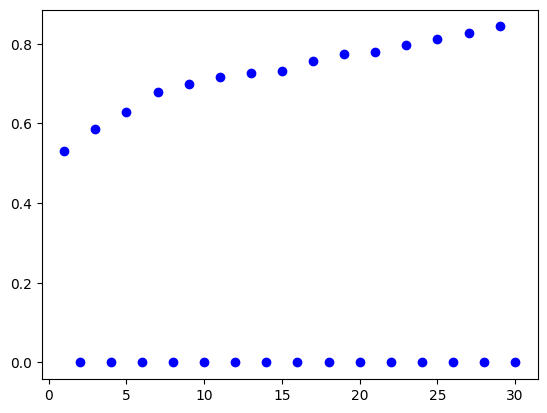

In [9]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()